In [25]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_2')
dir = os.getcwd()
dir

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_2'

In [3]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [4]:
files = os.listdir(train_data)
print(files[:3])

['angry', 'disgusted', 'fearful']


### CNN model for training 

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [6]:
#  mod = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax")

## Tranfer Learning

In [7]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [8]:
ip=mod.layers[0].input
op=mod.layers[-2].output


In [9]:
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [10]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [11]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# model = tf.keras.models.Sequential([
    
#     op,
#     tf.keras.layers.Dense(1024 , activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512 , activation='relu'),
#     tf.keras.layers.Dense(7 , activation='softmax')
    
# ])

In [14]:
# model.summary()

In [15]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

# Augmentation


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,#rotates the image in 0 to 40 degree range randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'# lost pixels are replaced by the nearest pixels
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [17]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=800,epochs=50,validation_data=test_data_gen, verbose=2 ,batch_size =10 )

Epoch 1/50
800/800 - 200s - loss: 1.8274 - accuracy: 0.2471 - val_loss: 1.6272 - val_accuracy: 0.3286
Epoch 2/50
800/800 - 187s - loss: 1.5668 - accuracy: 0.3907 - val_loss: 1.3425 - val_accuracy: 0.4943
Epoch 3/50
800/800 - 188s - loss: 1.4340 - accuracy: 0.4579 - val_loss: 1.3550 - val_accuracy: 0.5074
Epoch 4/50
800/800 - 188s - loss: 1.3705 - accuracy: 0.4855 - val_loss: 1.2107 - val_accuracy: 0.5467
Epoch 5/50
800/800 - 191s - loss: 1.2918 - accuracy: 0.5157 - val_loss: 1.2110 - val_accuracy: 0.5440
Epoch 6/50
800/800 - 188s - loss: 1.2841 - accuracy: 0.5225 - val_loss: 1.1159 - val_accuracy: 0.5864
Epoch 7/50
800/800 - 188s - loss: 1.2259 - accuracy: 0.5640 - val_loss: 1.1843 - val_accuracy: 0.5687
Epoch 8/50
800/800 - 188s - loss: 1.1946 - accuracy: 0.5622 - val_loss: 1.1336 - val_accuracy: 0.5829
Epoch 9/50
800/800 - 188s - loss: 1.1979 - accuracy: 0.5587 - val_loss: 1.0878 - val_accuracy: 0.5982
Epoch 10/50
800/800 - 188s - loss: 1.1528 - accuracy: 0.5837 - val_loss: 1.0508 - 

In [18]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.24712499976158142, 0.390749990940094, 0.45787501335144043, 0.4855000078678131, 0.5156894326210022, 0.5224999785423279, 0.5640000104904175, 0.5621953010559082, 0.5587499737739563, 0.5836979746818542, 0.581250011920929, 0.5878750085830688, 0.6003749966621399, 0.6057500243186951, 0.6117500066757202, 0.6051250100135803, 0.6082500219345093, 0.6187499761581421, 0.6186249852180481, 0.6331250071525574, 0.6248281002044678, 0.6328291296958923, 0.6348749995231628, 0.643875002861023, 0.6446250081062317, 0.6507499814033508, 0.6492499709129333, 0.6452500224113464, 0.6487500071525574, 0.6464999914169312, 0.6584572792053223, 0.6577500104904175, 0.6777499914169312, 0.6629999876022339, 0.674875020980835, 0.6779999732971191, 0.6636250019073486, 0.6673334240913391, 0.6910864114761353, 0.6796249747276306, 0.687624990940094, 0.690211296081543, 0.6955869197845459, 0.6896250247955322, 0.6860857605934143, 0.7007499933242798, 0.6915000081062317, 0.6927499771118164, 0.7081249952316284, 0.7121250033378601]
[0.

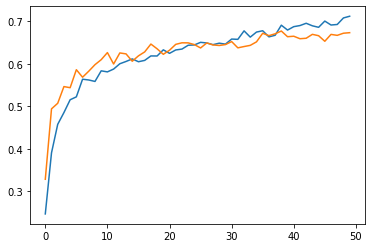

In [19]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()